<h1>Soal 1: Pemahaman Algoritma</h1>

Jawab Pertanyaan di bawah ini dengan penyampaian bahasa sendiri!

1. Bagaimana proses algoritma KNN?
2. Jelaskan minimal 2 kekurangan dari algoritma KNN?

Jawab:

1. Proses Algoritma KNN
  - Menghitung Euclidian Distance (Jarak antar titik ke pusat centroid)
  - Tentukan banyaknya K
  - Pilih nilai terbanyak

2. Kekurangan KNN
  - Sangat sensitif terhadap data pencilan(outlier)
  - Jika K genap dan poin label sama, maka akan dipilih random

---

<h1>Soal 2: Pengaplikasian Algoritma KNN</h1>

- Buatlah model KNN
- Training model tersebut kepada data X_train dengan hyperparameter kombinasi antara  2<= k <=20 dan weights bernilai 'uniform', dan 'distance'  
- Lakukan prediksi terhadap data X_test untuk model di setiap kombinasi k dan weights
- Score dengan accuracy dari hasil prediksi terhadap data X_test untuk setiap kombinasi hyperparameter, masukan score tersebut ke dalam objek list dengan di groupkan berdasarkan jenis weights, sehingga di akhir kita punya variable misalkan list_uniform_score, dan list_distance_score
- Plot kedua list tersebut dengan lineplot kedalam satu axis dan bandingkan hasilnya

In [16]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

wine = load_wine()
df = pd.DataFrame(np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['class'])

#Preprocessing data
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

list_uniform_score = []
list_distance_score = []
for k1 in range(2, 21):
  # Weight Uniform
  neigh1 = KNeighborsClassifier(n_neighbors=k1, weights='uniform')
  neigh1.fit(X_train, y_train)
  prediksi1 = neigh1.score(X_test, y_test)
  list_uniform_score.append(prediksi1)

for k2 in range(2, 21):
  # Weight Distance
  neigh2 = KNeighborsClassifier(n_neighbors=k2, weights='distance')
  neigh2.fit(X_train, y_train)
  prediksi2 = neigh2.score(X_test, y_test)
  list_distance_score.append(prediksi2)

print('Uniform Scores: \n', list_uniform_score)
print('Distance Scores: \n', list_distance_score)

Uniform Scores: 
 [0.6944444444444444, 0.8055555555555556, 0.7222222222222222, 0.6666666666666666, 0.6388888888888888, 0.75, 0.6388888888888888, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.6388888888888888, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112, 0.6666666666666666, 0.6388888888888888, 0.6666666666666666, 0.6111111111111112]
Distance Scores: 
 [0.75, 0.8333333333333334, 0.7777777777777778, 0.75, 0.7222222222222222, 0.75, 0.6944444444444444, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


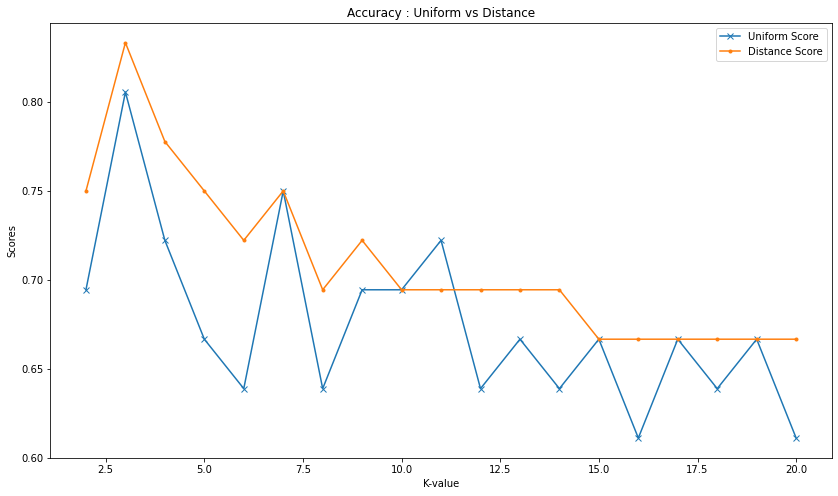

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
ax.plot(np.arange(2,21), list_uniform_score, marker='x', label='Uniform Score')
ax.plot(np.arange(2,21), list_distance_score, marker='.', label='Distance Score')
ax.set_title('Accuracy : Uniform vs Distance')
ax.set_xlabel('K-value')
ax.set_ylabel('Scores')
ax.legend()
plt.show()

Contoh hasil yang di harapkan :


```
Uniform Scores:
[0.6944444444444444,
 0.8055555555555556,
 0.7222222222222222,
 0.6666666666666666,
 0.6388888888888888,
 0.75,
 0.6388888888888888,
 0.6944444444444444,
 0.6944444444444444,
 0.7222222222222222,
 0.6388888888888888,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112,
 0.6666666666666666,
 0.6388888888888888,
 0.6666666666666666,
 0.6111111111111112]

Distance scores:
[0.75,
 0.8333333333333334,
 0.7777777777777778,
 0.75,
 0.7222222222222222,
 0.75,
 0.6944444444444444,
 0.7222222222222222,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6944444444444444,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]
```



 


![alt text](https://drive.google.com/uc?id=1pppy_BWQsg5tdgOBEU1GgiHSklLLoimt)

---

<h1>Soal 3: Pengaplikasian Model Linear Regression</h1>

Applikasikan model linear regresi kedalam data berikut. Kemudian tunjukan parameter koefesien dan intercept dari model tersebut.

In [29]:
import numpy as np

rng = np.random.RandomState(1)

X = 10 * rng.rand(50, 4)
y = np.array([  0.9826564 ,  49.40390035,  85.76013175,  29.17254633,
        11.270054  ,  61.53852735, -19.52503854,  10.10230867,
        82.03058206,  45.72660678,  82.09252575,  90.78872391,
        67.94178098,  39.97492762, 124.78866966,  85.24615819,
        85.68491086,  80.39481211,  14.54591581, 137.19722354,
        85.04063428,  94.76681927,  84.64289989,  38.76421156,
        47.33953927,  94.50853335,  77.3276567 ,  -9.77846805,
        61.13434468,  42.12124052,  26.65634335, 120.41593333,
       138.08132504, 103.33745675, 145.64447692,  19.54777986,
        87.40631024, 111.47327389,  95.94874761, 146.34817502,
       118.10333528,  56.85956484, 108.57660235, 114.30790247,
        40.27107041,  73.83871008,  45.52217182,  -7.57752547,
       147.81772162, 139.40285349])

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print(model.coef_)
print(model.intercept_)

[ 1.5 -5.   9.  10. ]
0.5000000016247981
